# 1. 라이브러리 및 패키지 불러오기 

In [141]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re  

# 2. 데이터 불러오기

In [142]:
log_data = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/log_data.csv')

In [143]:
relog = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/relog.csv')

In [144]:
user_spec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/user_spec.csv')

In [145]:
loan_result = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/loan_result.csv')

## 2-1. 데이터 확인하기

## 2) user_spec 데이터

In [146]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [147]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [148]:
respec = user_spec

### 2-1) income_type

In [149]:
# 근로형태
# -> 입사연월, 한도조회 당시 유저 신용점수, 대출희망금액, 고용형태, 주거소유형태, 근로형태, 개인회생자 납입 완료 여부, 개인회생자여부, 대출목적, 연소득
respec[respec['income_type'].isnull()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0


In [150]:
#loan_result[loan_result['application_id']==129515]
#loan_result[loan_result['application_id']==1468193]
#loan_result[loan_result['application_id']==1234909]

In [151]:
respec = respec.dropna(subset = ['income_type'])

### 2-2) yearly_income

In [152]:
# 연소득이 null 값인 컬럼의 사람 중 4명이 입사연월이 null 값, 근로형태가 OTHERINCOME
# 4명이 20대, 1명이 40대인데, 40대인 사람은 사업 준비 중이며 무직이라 해도 무방하다 생각함
respec[respec['yearly_income'].isnull()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaN,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,20220630.0,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaN,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaN,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaN,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0


In [153]:
# 4번쨰의 사람만 loan_result 데이터 셋에서의 값이 존재한다.
# 4번쨰 사람을 제외하고 4명의 사람은 join하는 과정에서 없어질 것임.
#loan_result[loan_result['application_id'] == 1026915]
#loan_result[loan_result['application_id'] == 2045613]
#loan_result[loan_result['application_id'] == 391560]
loan_result[loan_result['application_id'] == 341149]
#loan_result[loan_result['application_id'] == 1330905]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
4495392,341149,2022-06-30 21:32:20,64,254,45000000.0,10.3,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35000000.0,16.4,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5000000.0,19.5,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15000000.0,12.5,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10000000.0,9.1,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23000000.0,15.4,NaN


In [154]:
# 평균 연소득 3,621,104.90730 / 월 350만원 정도?
# 5개 컬럼의 null 값은 평균으로 채워도 될 것 같다고 생각했음.
respec['yearly_income'].mean()

43453258.887647174

In [155]:
respec['yearly_income'] = respec['yearly_income'].fillna(respec['yearly_income'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
respec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


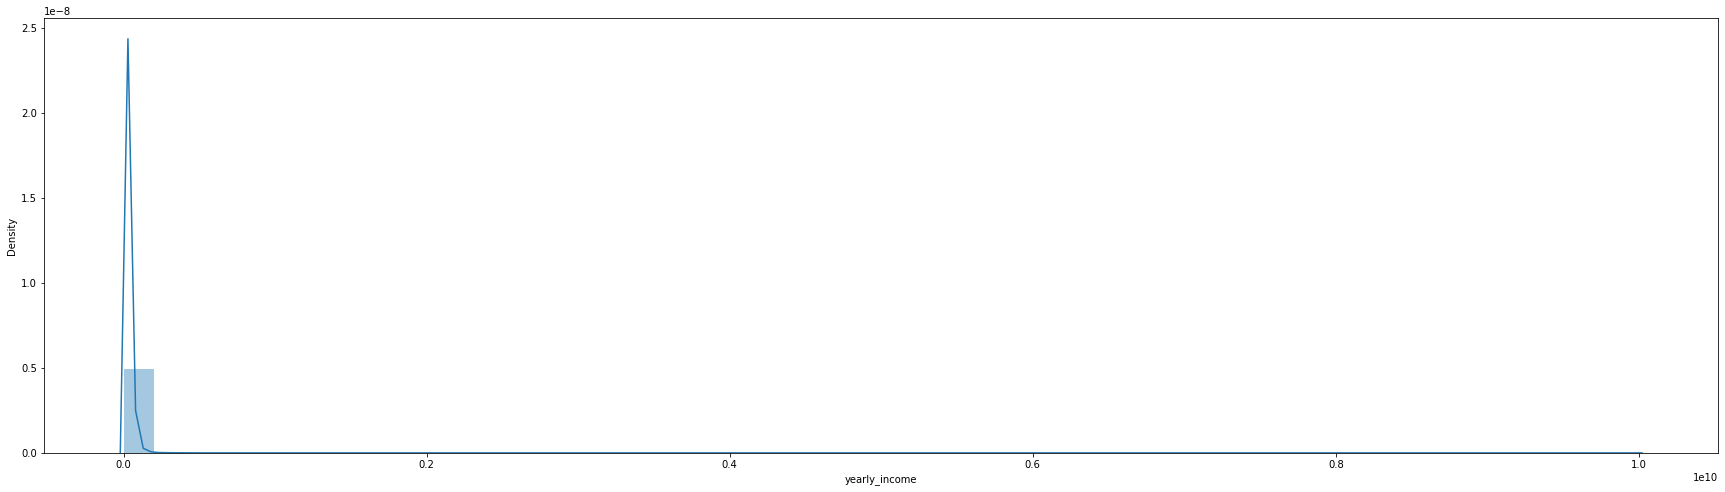

In [157]:
plt.figure(figsize=(30,8))
plt.rcParams['font.family'] = 'NanumGothic'
sns.distplot(respec['yearly_income'])
plt.show()

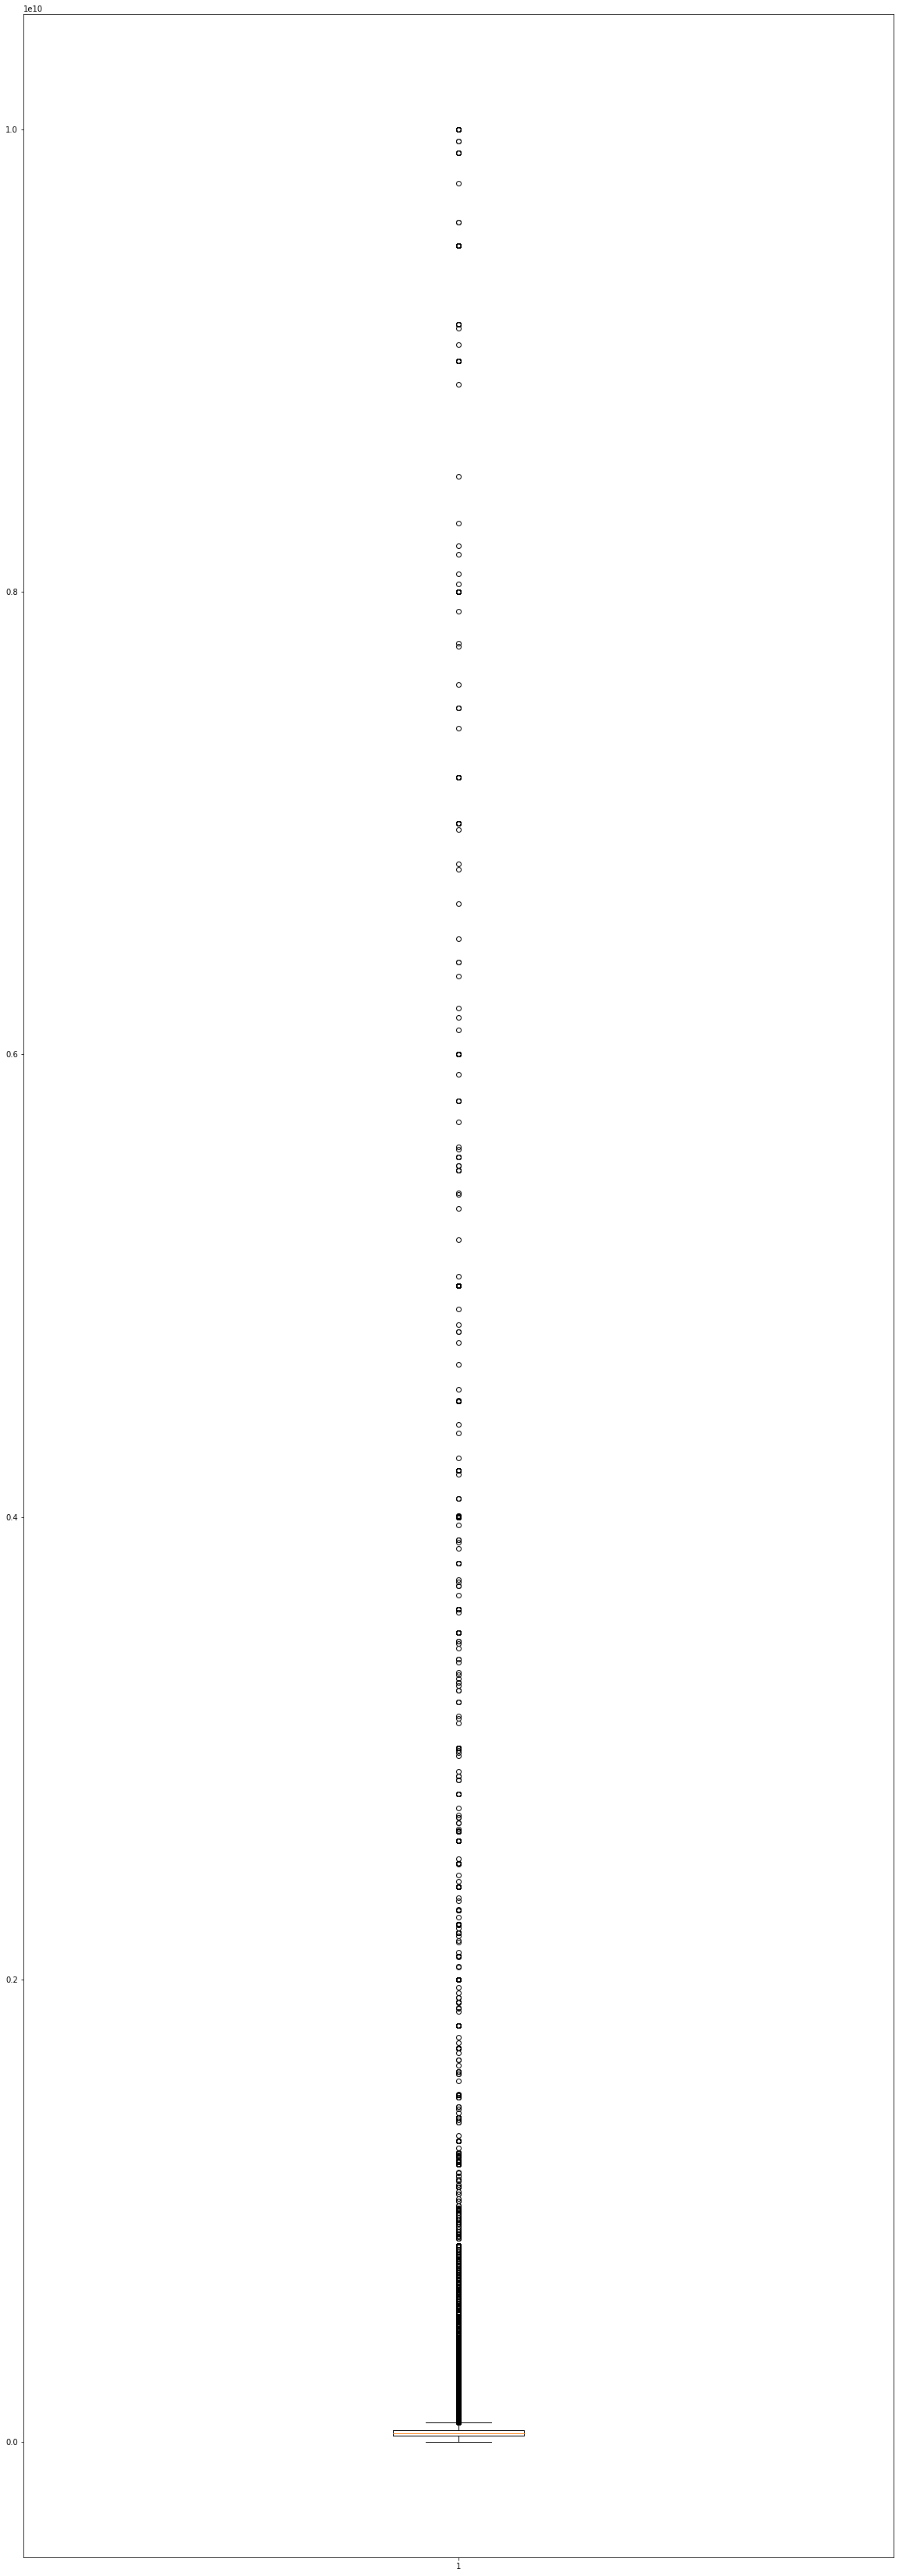

In [158]:
plt.figure(figsize=(20, 60))
plt.boxplot(respec['yearly_income'])
plt.show()

In [159]:
# 가장 많은 연소득 100억
respec.sort_values(by='yearly_income', ascending=False) 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
34630,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,200807.0,정규직,자가,1.000000e+10,생활비,NaN,NaN,NaN,NaN
1106869,210966,580362,1992.0,1.0,2022-05-06 16:52:16,810.0,1.000000e+10,OTHERINCOME,NaN,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
257318,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,200807.0,정규직,자가,1.000000e+10,생활비,NaN,NaN,NaN,NaN
386975,556402,580362,1992.0,1.0,2022-05-23 22:57:14,810.0,1.000000e+10,FREELANCER,201401.0,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
119274,1314852,580362,1992.0,1.0,2022-04-30 22:41:59,810.0,1.000000e+10,FREELANCER,201001.0,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646113,1684740,148079,1986.0,0.0,2022-06-26 11:40:50,580.0,0.000000e+00,OTHERINCOME,NaN,기타,기타가족소유,3.000000e+06,생활비,0.0,0.0,6.0,23000000.0
1319270,1476472,111290,1990.0,1.0,2022-05-13 10:20:31,620.0,0.000000e+00,OTHERINCOME,NaN,기타,전월세,1.000000e+07,생활비,0.0,NaN,3.0,28000000.0
593419,1848311,153513,1996.0,0.0,2022-06-20 10:44:47,650.0,0.000000e+00,OTHERINCOME,NaN,기타,기타가족소유,1.000000e+06,생활비,0.0,0.0,NaN,NaN
1380931,1546415,454369,1996.0,1.0,2022-05-07 11:32:20,620.0,0.000000e+00,OTHERINCOME,NaN,기타,기타가족소유,7.000000e+06,대환대출,0.0,0.0,6.0,14000000.0


In [160]:
respec[respec['yearly_income'] == 1.000000e+10]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
34630,277856,169742,1981.0,0.0,2022-03-30 11:07:59,1000.0,1.000000e+10,EARNEDINCOME,200807.0,정규직,자가,1.000000e+10,생활비,NaN,NaN,NaN,NaN
95315,819151,828388,1989.0,1.0,2022-06-17 10:51:53,940.0,1.000000e+10,EARNEDINCOME,20170101.0,정규직,자가,1.000000e+10,생활비,0.0,NaN,NaN,NaN
119274,1314852,580362,1992.0,1.0,2022-04-30 22:41:59,810.0,1.000000e+10,FREELANCER,201001.0,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
257318,1585468,169742,1981.0,0.0,2022-03-29 18:04:40,1000.0,1.000000e+10,EARNEDINCOME,200807.0,정규직,자가,1.000000e+10,생활비,NaN,NaN,NaN,NaN
363473,133864,580362,1992.0,1.0,2022-05-14 01:37:36,810.0,1.000000e+10,FREELANCER,201401.0,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
386975,556402,580362,1992.0,1.0,2022-05-23 22:57:14,810.0,1.000000e+10,FREELANCER,201401.0,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
1106869,210966,580362,1992.0,1.0,2022-05-06 16:52:16,810.0,1.000000e+10,OTHERINCOME,NaN,기타,기타가족소유,2.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
1116464,1799754,580362,1992.0,1.0,2022-06-09 00:52:21,800.0,1.000000e+10,FREELANCER,20140101.0,기타,기타가족소유,3.000000e+08,사업자금,0.0,NaN,5.0,20000000.0
1179435,1336031,781341,1989.0,1.0,2022-06-21 21:09:13,650.0,1.000000e+10,EARNEDINCOME,20210801.0,계약직,기타가족소유,0.000000e+00,대환대출,0.0,NaN,5.0,102000000.0


### 2-3) gender

In [161]:
respec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12959
gender                                   12959
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
company_enter_month                     171675
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
dtype: int64

In [162]:
# reage
respec[respec['gender'].isnull()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
253,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0
507,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN
891,954344,364670,NaN,NaN,2022-03-19 21:05:28,950.0,10000000.0,PRIVATEBUSINESS,202005.0,정규직,기타가족소유,20000000.0,사업자금,NaN,NaN,NaN,NaN
979,1082273,587345,NaN,NaN,2022-05-31 09:58:59,NaN,15000000.0,EARNEDINCOME,202103.0,정규직,전월세,20000000.0,생활비,0.0,0.0,NaN,NaN
1038,2100576,744785,NaN,NaN,2022-03-29 16:44:04,740.0,34000000.0,EARNEDINCOME,202109.0,정규직,기타가족소유,40000000.0,기타,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393578,1496444,239255,NaN,NaN,2022-04-27 01:07:48,NaN,30000000.0,FREELANCER,202204.0,기타,전월세,7000000.0,생활비,0.0,0.0,NaN,NaN
1393587,1824869,433763,NaN,NaN,2022-04-27 13:40:54,NaN,24000000.0,OTHERINCOME,NaN,기타,전월세,24000000.0,대환대출,0.0,NaN,NaN,NaN
1393649,471527,397914,NaN,NaN,2022-04-27 00:47:58,520.0,28000000.0,EARNEDINCOME,202202.0,정규직,기타가족소유,12000000.0,생활비,0.0,NaN,5.0,15000000.0
1393786,809359,570962,NaN,NaN,2022-04-18 23:15:37,880.0,24000000.0,OTHERINCOME,NaN,기타,기타가족소유,10000000.0,생활비,NaN,NaN,1.0,NaN


In [163]:
loan_result[loan_result['application_id'] == 1093354]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
3254057,1093354,2022-03-29 14:06:02,30,85,10000000.0,18.3,1.0


In [164]:
# 남성이 2배에 달함
respec['gender'].value_counts()

1.0    934267
0.0    446905
Name: gender, dtype: int64

In [165]:
# EARNEDINCOME: 직장가입자(4대보험O)
# EARNEDINCOME2: 직장가입자(4대보험X)
# PRIVATEBUSINESS: 개인사업자
#PRACTITIONER: 전문직
# FREELANCER: 프리랜서
# OTHERINCOME: 기타소득
respec['income_type'].unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER'], dtype=object)

In [166]:
respec['income_type'] = respec['income_type'].replace("PRIVATEBUSINESS", 1).replace("FREELANCER", 2).replace("EARNEDINCOME", 3).replace("OTHERINCOME", 4).replace("EARNEDINCOME2", 5).replace("PRACTITIONER", 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


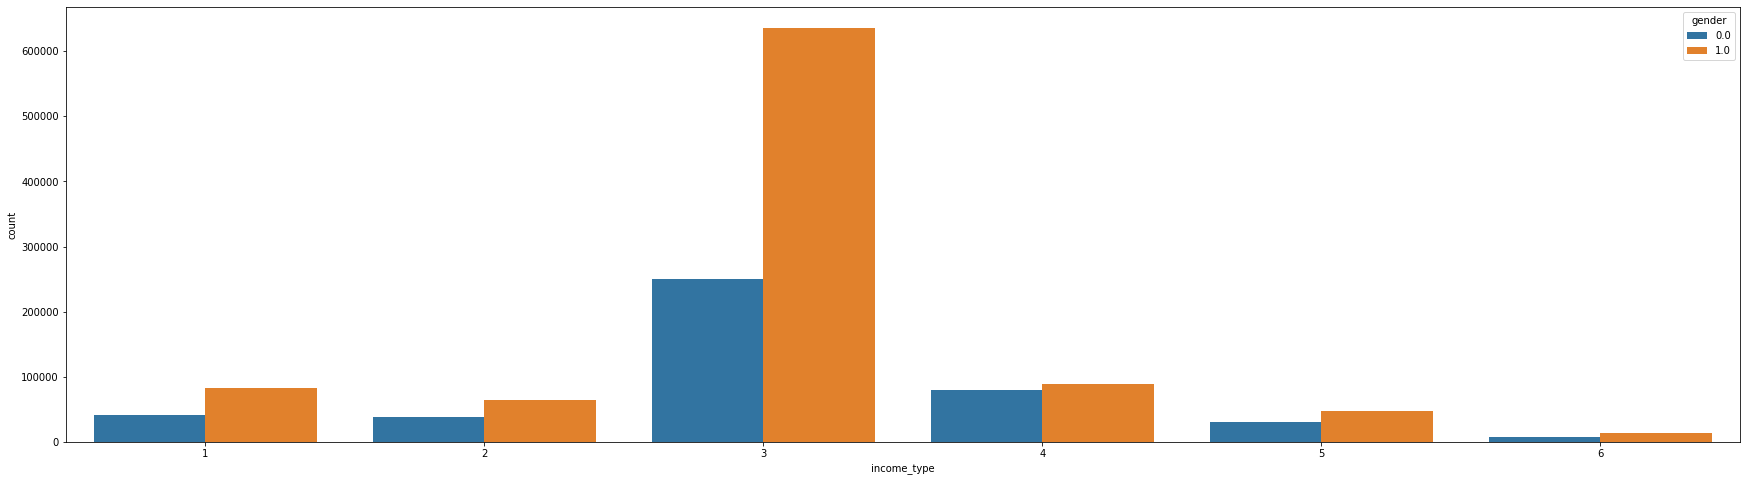

In [167]:
# 전체적으로 남성이 많지만, 특정 직업(개인 사업자)에 남성이 유독 많은 것을 확인
plt.figure(figsize=(30,8))
sns.countplot(x="income_type", hue="gender", data=respec)
plt.show()

In [168]:
respec[['income_type','gender']].value_counts()

income_type  gender
3            1.0       636026
             0.0       249563
4            1.0        89663
1            1.0        83394
4            0.0        79985
2            1.0        63912
5            1.0        48091
1            0.0        41786
2            0.0        38969
5            0.0        29822
6            1.0        13181
             0.0         6780
dtype: int64

####       1        0
####1     67        33     // 7:3
####2     62        38     // 6:4
####3     72        28     // 7:3
####4     53        47     // 5:5
####5     62        38     // 6:4
####6     66        34     // 7:3

In [169]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 1), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 1), 'gender'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [170]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.4:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 2), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 2), 'gender'] = 0

In [171]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 3), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 3), 'gender'] = 0

In [172]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.5:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 4), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 4), 'gender'] = 0

In [173]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.4:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 5), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 5), 'gender'] = 0

In [174]:
rnd_num = np.random.uniform(0, 1, 1)

if rnd_num > 0.3:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 6), 'gender'] = 1
else:
  respec.loc[(respec['gender'].isnull()) & (respec['income_type'] == 6), 'gender'] = 0

In [175]:
# 결론적으로 gender의 null값은 남성으로 채움
#respec['gender'] = respec['gender'].fillna(0)

### 2-5) birth_year

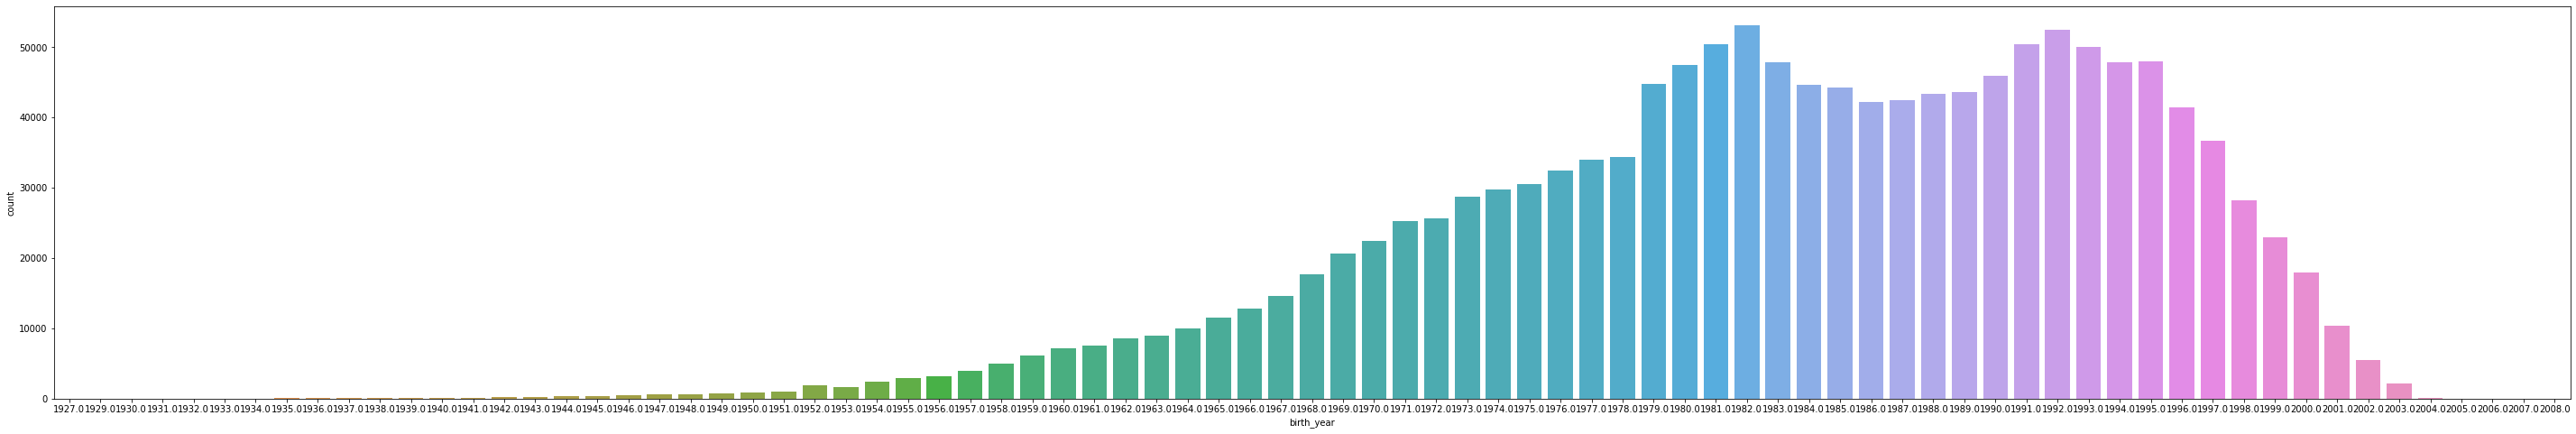

In [176]:
# 1979~1995년생까지의 데이터가 많음 
plt.figure(figsize=(50,8))
sns.countplot(x="birth_year", data=respec)
plt.show()

In [177]:
respec['age'] = 2022 - respec['birth_year'] + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
respec.loc[respec['age'] < 20, 'reage'] = 10
respec.loc[(respec['age'] >= 20) & (respec['age'] <30), 'reage'] = 20
respec.loc[(respec['age'] >= 30) & (respec['age'] <40), 'reage'] = 30
respec.loc[(respec['age'] >= 40) & (respec['age'] <50), 'reage'] = 40
respec.loc[(respec['age'] >= 50) & (respec['age'] <60), 'reage'] = 50
respec.loc[(respec['age'] >= 60) & (respec['age'] <70), 'reage'] = 60
respec.loc[(respec['age'] >= 70) & (respec['age'] <80), 'reage'] = 70
respec.loc[(respec['age'] >= 80) & (respec['age'] <90), 'reage'] = 80
respec.loc[respec['age'] >= 90, 'reage'] = 90

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


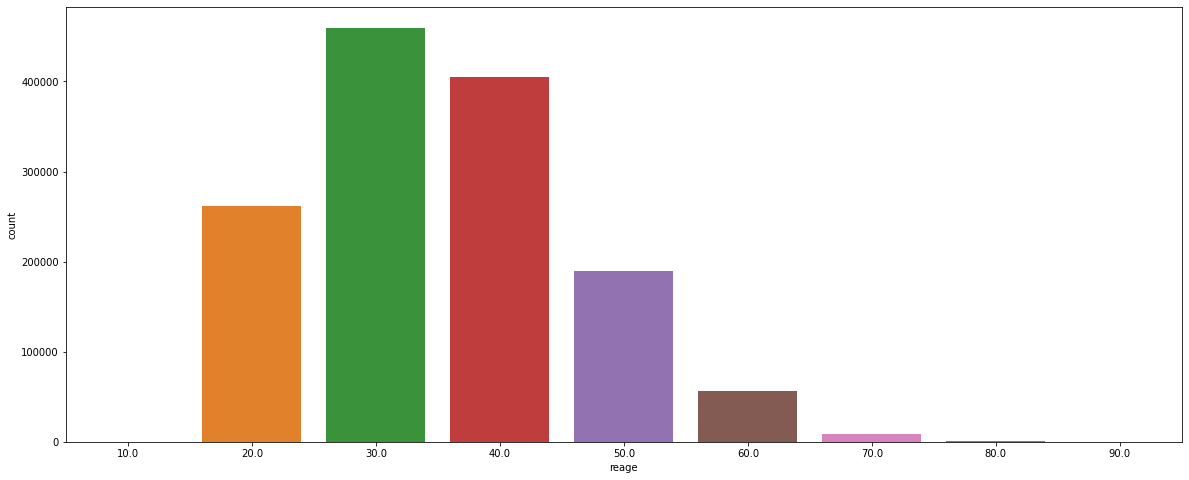

In [179]:
# 3-40대가 많음
# 20대 청년 / 3-40 중장년 / 50대 이상 노년층
plt.figure(figsize=(20,8))
sns.countplot(x="reage", data=respec)
plt.show()

In [210]:
respec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,1,20151101.0,기타,...,1000000.0,기타,0.0,NaN,4.0,162000000.0,38.0,30.0,NaN,ETC
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,1,20070201.0,정규직,...,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,55.0,50.0,NaN,SWITCHLOAN
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,2,20210901.0,기타,...,10000000.0,생활비,0.0,NaN,5.0,15000000.0,26.0,20.0,1020.0,LIVING
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,3,20170101.0,정규직,...,2000000.0,생활비,0.0,NaN,7.0,344000000.0,34.0,30.0,NaN,LIVING
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,3,20210901.0,정규직,...,5000000.0,생활비,0.0,0.0,1.0,16000000.0,23.0,20.0,1020.0,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,202106.0,기타,...,5000000.0,사업자금,NaN,NaN,NaN,NaN,23.0,20.0,1020.0,BUSINESS
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,NaN,기타,...,50000000.0,생활비,NaN,NaN,1.0,NaN,68.0,60.0,NaN,LIVING
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,200908.0,정규직,...,100000000.0,대환대출,NaN,NaN,8.0,200000000.0,40.0,40.0,NaN,SWITCHLOAN
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,201705.0,정규직,...,10000000.0,대환대출,NaN,NaN,10.0,117000000.0,48.0,40.0,NaN,SWITCHLOAN


In [211]:
plt.figure(figsize=(50,8))
sns.countplot(x="yearly_income", hue = 'age',data=respec)
plt.show()

KeyboardInterrupt: ignored

In [180]:
respec.loc[respec['reage'] <= 20, 'reage1'] = 1020
respec.loc[(respec['reage'] >= 30) & (respec['reage1'] <= 40), 'reage1'] = 3040
respec.loc[(respec['reage'] >= 50) & (respec['reage1'] <= 90), 'reage1'] = 5060

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [181]:
respec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,1,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0,38.0,30.0,NaN
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,1,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,55.0,50.0,NaN
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,2,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0,26.0,20.0,1020.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,3,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0,34.0,30.0,NaN
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,3,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,23.0,20.0,1020.0


In [182]:
# 출생일의 빈 값의 대부은 입사일의 값이 있다.
respec[respec['birth_year'].isnull() & respec['company_enter_month']]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1
507,1093354,77317,NaN,1.0,2022-03-29 14:06:02,540.0,6000000.0,5,202107.0,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,954344,364670,NaN,1.0,2022-03-19 21:05:28,950.0,10000000.0,1,202005.0,정규직,기타가족소유,20000000.0,사업자금,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,1082273,587345,NaN,1.0,2022-05-31 09:58:59,NaN,15000000.0,3,202103.0,정규직,전월세,20000000.0,생활비,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1038,2100576,744785,NaN,1.0,2022-03-29 16:44:04,740.0,34000000.0,3,202109.0,정규직,기타가족소유,40000000.0,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,503482,218561,NaN,1.0,2022-05-06 09:17:05,660.0,42000000.0,5,202110.0,정규직,기타가족소유,15000000.0,LIVING,NaN,NaN,6.0,30000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392516,459654,596437,NaN,1.0,2022-05-12 14:13:14,650.0,55000000.0,3,201805.0,정규직,전월세,300000000.0,LIVING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392684,2094252,663387,NaN,1.0,2022-03-02 12:48:36,NaN,31000000.0,3,202108.0,정규직,전월세,30000000.0,생활비,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1393096,1276825,316983,NaN,1.0,2022-05-29 22:12:01,NaN,28000000.0,3,202204.0,정규직,기타가족소유,2000000.0,생활비,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1393578,1496444,239255,NaN,0.0,2022-04-27 01:07:48,NaN,30000000.0,2,202204.0,기타,전월세,7000000.0,생활비,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### 2-5) 대출목적

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

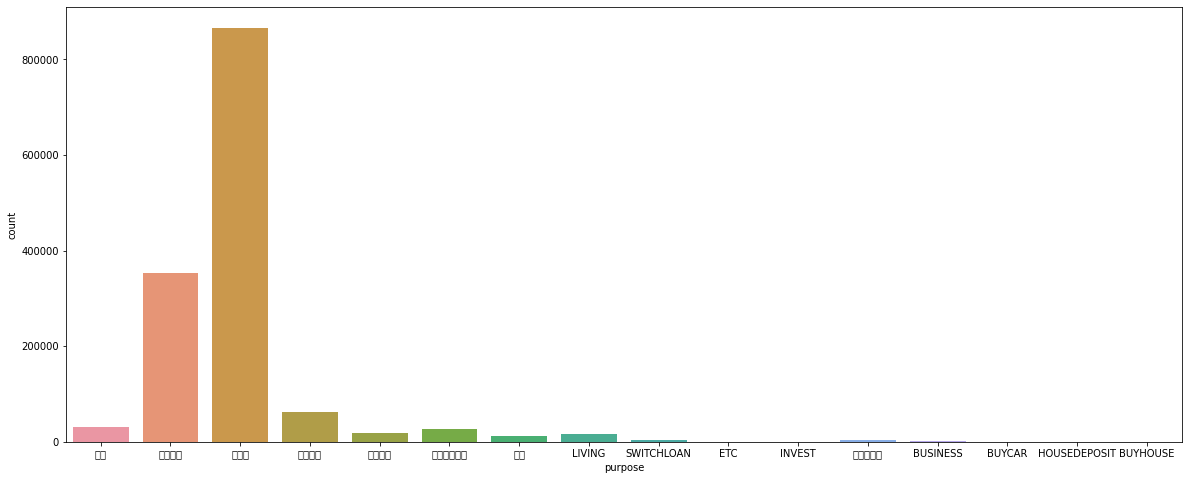

In [183]:
plt.figure(figsize=(20,8))
sns.countplot(x="purpose", data=respec)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

In [184]:
respec['purpose'].unique()

array(['기타', '대환대출', '생활비', '사업자금', '주택구입', '전월세보증금', '투자', 'LIVING',
       'SWITCHLOAN', 'ETC', 'INVEST', '자동차구입', 'BUSINESS', 'BUYCAR',
       'HOUSEDEPOSIT', 'BUYHOUSE'], dtype=object)

In [185]:
respec.loc[respec['purpose'] == '기타', 'repurpose'] = 'ETC'
respec.loc[respec['purpose'] == '대환대출', 'repurpose'] = 'SWITCHLOAN'
respec.loc[respec['purpose'] == '생활비', 'repurpose'] = 'LIVING'
respec.loc[respec['purpose'] == '사업자금', 'repurpose'] = 'BUSINESS'
respec.loc[respec['purpose'] == '전월세보증금', 'repurpose'] = 'HOUSEDEPOSIT'
respec.loc[respec['purpose'] == '주택구입', 'repurpose'] = 'BUYHOUSE'
respec.loc[respec['purpose'] == '투자', 'repurpose'] = 'INVEST'
respec.loc[respec['purpose'] == '자동차구입', 'repurpose'] = 'BUYCAR'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


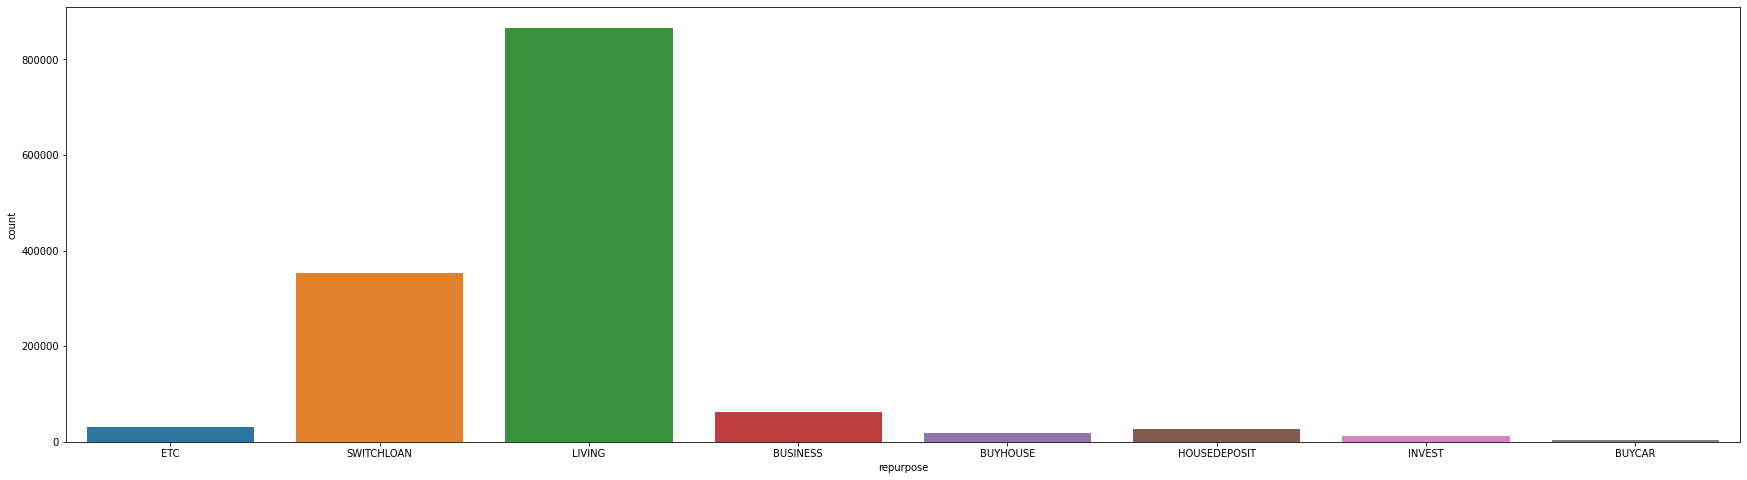

In [186]:
#생활비. 대환대출은 많은 비중을 차지함
plt.figure(figsize=(30,8))
sns.countplot(x="repurpose", data=respec)
plt.show()

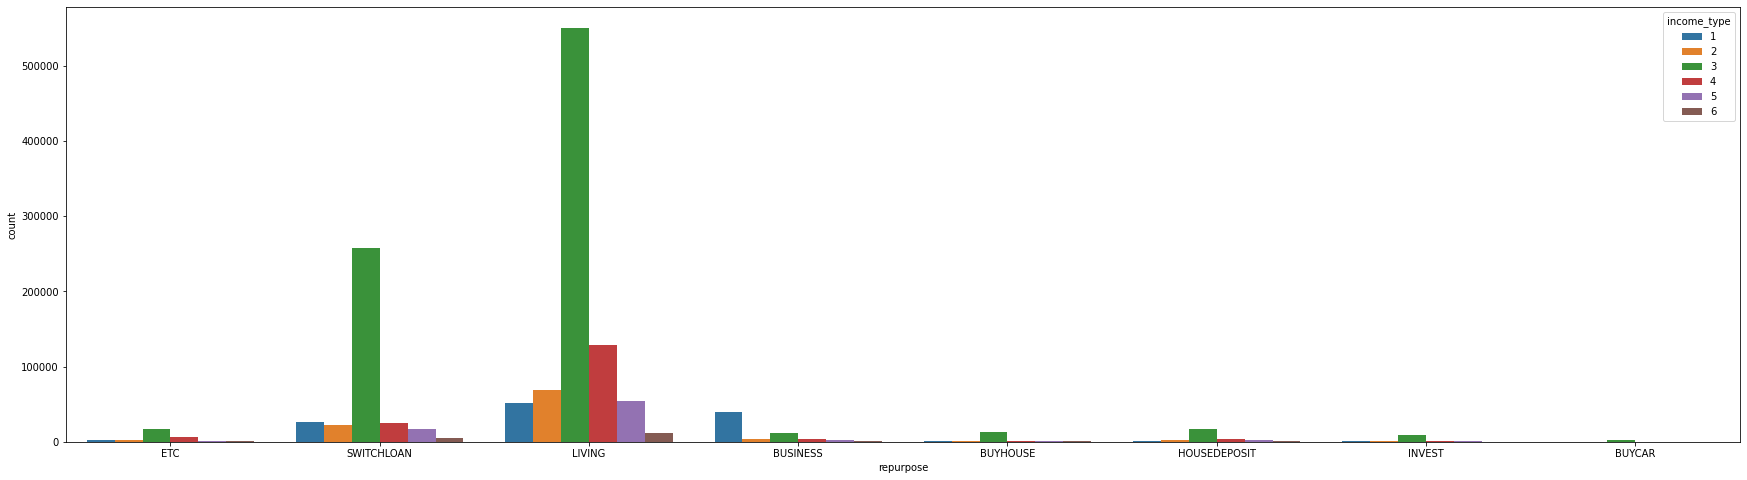

In [187]:
# 직업 유형에 따라서 대출의 목적이 다를 것이라 생각.

plt.figure(figsize=(30,8))
sns.countplot(x="repurpose", hue = 'income_type', data=respec)
plt.show()

In [188]:
respec2 = respec[respec['repurpose'].isnull()]

In [208]:
respec2

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,4,NaN,기타,...,15000000.0,대환대출,0.0,NaN,1.0,20000000.0,47.0,40.0,NaN,SWITCHLOAN
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,4,NaN,기타,...,20000000.0,생활비,0.0,NaN,1.0,NaN,58.0,50.0,NaN,LIVING
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,4,NaN,기타,...,50000000.0,기타,0.0,NaN,NaN,NaN,29.0,20.0,1020.0,ETC
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,4,NaN,기타,...,30000000.0,사업자금,0.0,NaN,1.0,NaN,40.0,40.0,NaN,BUSINESS
45,531087,260981,1976.0,1.0,2022-06-07 11:34:55,680.0,42000000.0,4,NaN,기타,...,6000000.0,생활비,0.0,NaN,15.0,42000000.0,47.0,40.0,NaN,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,4,NaN,기타,...,3000000.0,생활비,NaN,NaN,5.0,13000000.0,50.0,50.0,NaN,LIVING
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,4,NaN,기타,...,10000000.0,대환대출,NaN,NaN,NaN,NaN,29.0,20.0,1020.0,SWITCHLOAN
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,4,NaN,기타,...,100000000.0,대환대출,NaN,NaN,2.0,31000000.0,65.0,60.0,NaN,SWITCHLOAN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,4,NaN,기타,...,25000000.0,기타,NaN,NaN,NaN,NaN,27.0,20.0,1020.0,ETC


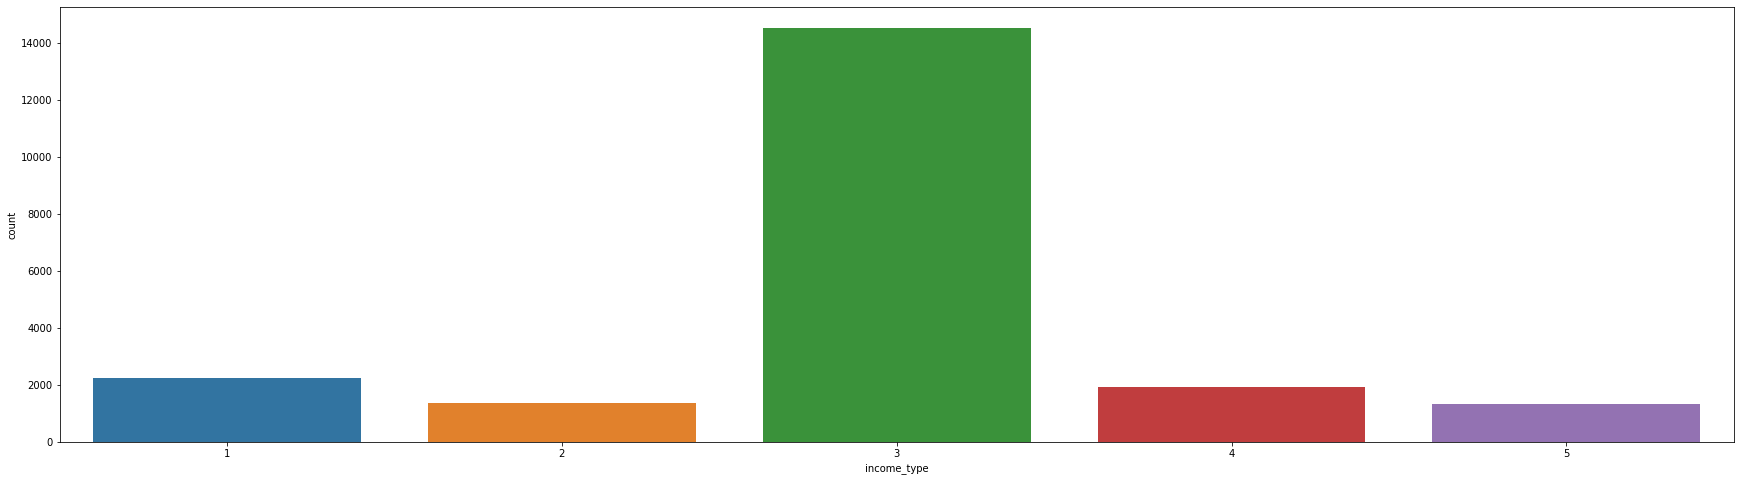

In [189]:
plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec2)
plt.show()

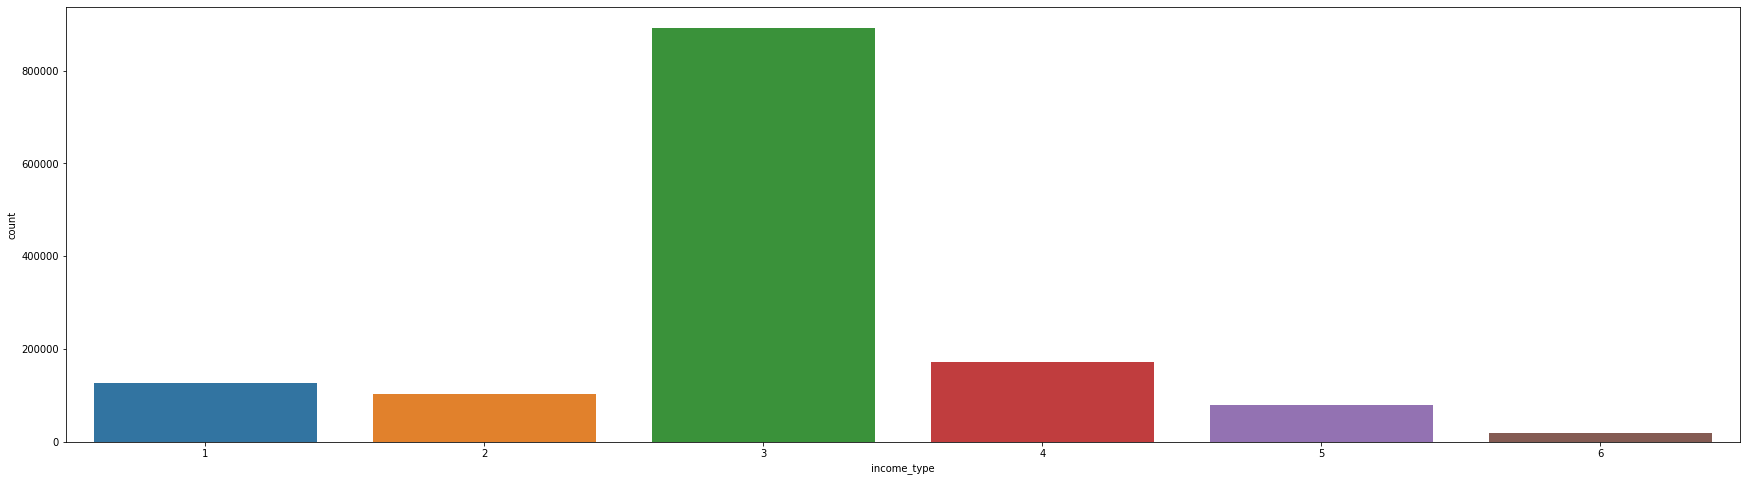

In [190]:
plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec)
plt.show()

In [191]:
# 비율대로 랜덤하게 넣는것은 어떤지?

### 2-4) company_enter_month

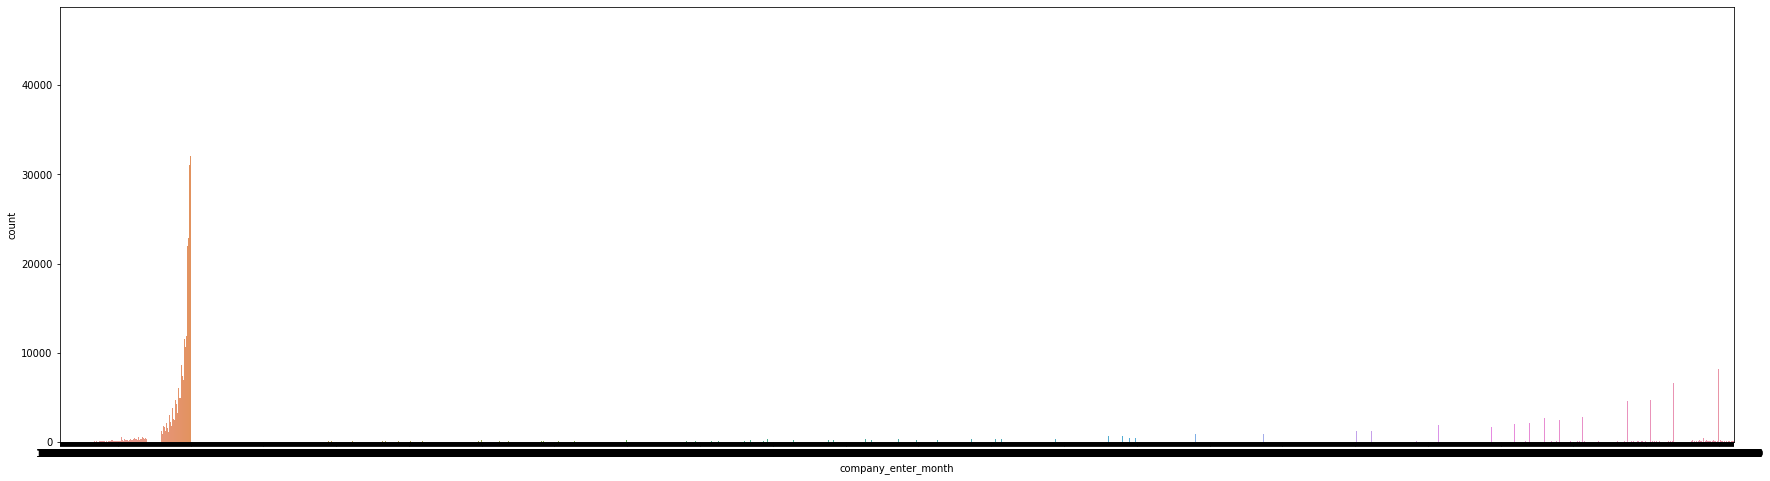

In [209]:
plt.figure(figsize=(30,8))
sns.countplot(x="company_enter_month", data=respec)
plt.show()

In [213]:
respec2 = respec['company_enter_month']
respec2['company_enter_month'].min()

KeyError: ignored

In [192]:
respec2 = respec[respec['company_enter_month'].isnull()]
respec2.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,4,NaN,기타,...,15000000.0,대환대출,0.0,NaN,1.0,20000000.0,47.0,40.0,NaN,SWITCHLOAN
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,4,NaN,기타,...,20000000.0,생활비,0.0,NaN,1.0,NaN,58.0,50.0,NaN,LIVING
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,4,NaN,기타,...,50000000.0,기타,0.0,NaN,NaN,NaN,29.0,20.0,1020.0,ETC
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,4,NaN,기타,...,30000000.0,사업자금,0.0,NaN,1.0,NaN,40.0,40.0,NaN,BUSINESS
45,531087,260981,1976.0,1.0,2022-06-07 11:34:55,680.0,42000000.0,4,NaN,기타,...,6000000.0,생활비,0.0,NaN,15.0,42000000.0,47.0,40.0,NaN,LIVING


In [193]:
respec[respec['company_enter_month'].isnull() & respec['birth_year']]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,4,NaN,기타,...,15000000.0,대환대출,0.0,NaN,1.0,20000000.0,47.0,40.0,NaN,SWITCHLOAN
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,4,NaN,기타,...,20000000.0,생활비,0.0,NaN,1.0,NaN,58.0,50.0,NaN,LIVING
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,4,NaN,기타,...,50000000.0,기타,0.0,NaN,NaN,NaN,29.0,20.0,1020.0,ETC
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,4,NaN,기타,...,30000000.0,사업자금,0.0,NaN,1.0,NaN,40.0,40.0,NaN,BUSINESS
45,531087,260981,1976.0,1.0,2022-06-07 11:34:55,680.0,42000000.0,4,NaN,기타,...,6000000.0,생활비,0.0,NaN,15.0,42000000.0,47.0,40.0,NaN,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,4,NaN,기타,...,3000000.0,생활비,NaN,NaN,5.0,13000000.0,50.0,50.0,NaN,LIVING
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,4,NaN,기타,...,10000000.0,대환대출,NaN,NaN,NaN,NaN,29.0,20.0,1020.0,SWITCHLOAN
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,4,NaN,기타,...,100000000.0,대환대출,NaN,NaN,2.0,31000000.0,65.0,60.0,NaN,SWITCHLOAN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,4,NaN,기타,...,25000000.0,기타,NaN,NaN,NaN,NaN,27.0,20.0,1020.0,ETC


In [194]:
respec2['income_type'].value_counts()

4    171665
3         7
1         3
Name: income_type, dtype: int64

In [195]:
respec3 = respec.dropna(subset = ['company_enter_month'])

In [196]:
# user_spec > 1394216 - 85
# respec > 1394131 
# respec2(null 값만) > 171675 
# respec3(null값 뺸거) > 1222456 
# respec4 > 921469  
# respec5 > 300987  
# respec6 >1222456  

In [197]:
respec4 = respec3[respec3['company_enter_month'] < 10000000]
respec4['company_enter_month'] = respec3['company_enter_month'] / 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [198]:
respec3[respec3['company_enter_month'] < 10000000].sort_values(by="company_enter_month", ascending= True) 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
375060,1525724,144890,1959.0,1.0,2022-05-13 18:58:32,NaN,84000000.0,3,191109.0,정규직,...,300000000.0,INVEST,NaN,NaN,NaN,NaN,64.0,60.0,NaN,NaN
283231,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,3,191411.0,정규직,...,40000000.0,HOUSEDEPOSIT,NaN,NaN,1.0,23000000.0,50.0,50.0,NaN,NaN
924046,724683,27284,1957.0,1.0,2022-04-13 13:02:03,520.0,45000000.0,3,191601.0,정규직,...,5000000.0,LIVING,NaN,NaN,4.0,79000000.0,66.0,60.0,NaN,NaN
1034981,873789,662329,1967.0,1.0,2022-05-01 16:06:11,NaN,34000000.0,3,191703.0,정규직,...,2000000.0,LIVING,NaN,NaN,NaN,NaN,56.0,50.0,NaN,NaN
342282,1011251,92946,1969.0,1.0,2022-04-21 19:43:40,680.0,34000000.0,3,191901.0,정규직,...,50000000.0,SWITCHLOAN,NaN,NaN,5.0,69000000.0,54.0,50.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407121,1323445,806906,2002.0,1.0,2022-06-01 22:46:50,740.0,20000000.0,5,202206.0,계약직,...,1000000.0,생활비,0.0,0.0,1.0,0.0,21.0,20.0,1020.0,LIVING
1153687,703028,121701,1992.0,1.0,2022-06-02 15:26:10,620.0,30000000.0,3,202206.0,정규직,...,10000000.0,생활비,0.0,NaN,2.0,43000000.0,31.0,30.0,NaN,LIVING
1377134,408209,623105,1971.0,1.0,2022-06-01 12:34:12,540.0,30000000.0,5,202206.0,정규직,...,3000000.0,생활비,0.0,NaN,1.0,NaN,52.0,50.0,NaN,LIVING
857386,390785,563134,1989.0,1.0,2022-05-15 16:39:15,750.0,25000000.0,3,202211.0,계약직,...,10000000.0,생활비,NaN,NaN,NaN,NaN,34.0,30.0,NaN,LIVING


In [199]:
respec3[respec3['company_enter_month'] > 10000000].sort_values(by="company_enter_month", ascending= True) 

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
72206,1851645,62189,1963.0,1.0,2022-06-28 12:20:40,580.0,100000000.0,2,19000627.0,기타,...,50000000.0,생활비,0.0,NaN,1.0,NaN,60.0,60.0,NaN,LIVING
1035881,809206,214941,1972.0,1.0,2022-06-25 12:04:46,860.0,60000000.0,3,19000701.0,정규직,...,50000000.0,대환대출,0.0,NaN,2.0,53000000.0,51.0,50.0,NaN,SWITCHLOAN
920650,553190,834301,1970.0,0.0,2022-06-30 12:16:56,200.0,10000000.0,5,19320630.0,정규직,...,5000000.0,생활비,0.0,NaN,NaN,NaN,53.0,50.0,NaN,LIVING
1009922,409617,621818,1960.0,0.0,2022-06-28 15:55:09,100.0,24000000.0,3,19560628.0,정규직,...,3000000.0,생활비,0.0,NaN,2.0,23000000.0,63.0,60.0,NaN,LIVING
1246270,1413225,132008,1966.0,1.0,2022-06-30 10:12:48,750.0,85000000.0,3,19660301.0,정규직,...,30000000.0,대환대출,0.0,NaN,4.0,381000000.0,57.0,50.0,NaN,SWITCHLOAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227231,1753826,401254,1968.0,0.0,2022-06-30 16:56:57,640.0,26000000.0,3,20220630.0,정규직,...,300000000.0,대환대출,0.0,NaN,3.0,37000000.0,55.0,50.0,NaN,SWITCHLOAN
436697,1847822,184499,1971.0,0.0,2022-06-30 22:36:20,600.0,32000000.0,3,20220630.0,정규직,...,15000000.0,대환대출,0.0,NaN,6.0,89000000.0,52.0,50.0,NaN,SWITCHLOAN
566159,1394149,587780,1970.0,1.0,2022-06-30 15:09:59,590.0,50000000.0,1,20220630.0,기타,...,50000000.0,사업자금,0.0,NaN,7.0,131000000.0,53.0,50.0,NaN,BUSINESS
1125694,1826407,363492,1987.0,1.0,2022-06-30 22:55:00,680.0,100000000.0,3,20220630.0,정규직,...,80000000.0,사업자금,0.0,NaN,NaN,NaN,36.0,30.0,NaN,BUSINESS


In [200]:
respec5 = respec3[respec3['company_enter_month'] > 10000000]
respec5['company_enter_month'] = respec3['company_enter_month'] / 10000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
# 입사연도
respec6 = pd.merge(respec4, respec5, how='outer')

In [202]:
respec6['company_enter_month'] = respec6['company_enter_month'].round(0)
respec6.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,5,2021.0,기타,...,25000000.0,대환대출,0.0,0.0,3.0,76000000.0,44.0,40.0,NaN,SWITCHLOAN
1,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,1,2012.0,정규직,...,50000000.0,사업자금,0.0,0.0,NaN,NaN,44.0,40.0,NaN,BUSINESS
2,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,1,2012.0,정규직,...,10000000.0,생활비,NaN,NaN,1.0,14000000.0,47.0,40.0,NaN,LIVING
3,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,3,2018.0,정규직,...,40000000.0,대환대출,0.0,NaN,4.0,142000000.0,44.0,40.0,NaN,SWITCHLOAN
4,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,3,2019.0,정규직,...,13000000.0,대환대출,0.0,NaN,3.0,36000000.0,30.0,30.0,NaN,SWITCHLOAN


#### ver.1 입사 나이

In [203]:
# 입사 나이
respec6['company_enter_age'] = respec6['company_enter_month'] - respec6['birth_year']
respec6.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose,company_enter_age
0,1945260,836762,1979.0,1.0,2022-04-20 01:23:09,670.0,50000000.0,5,2021.0,기타,...,대환대출,0.0,0.0,3.0,76000000.0,44.0,40.0,NaN,SWITCHLOAN,42.0
1,1384503,8623,1979.0,0.0,2022-04-20 18:51:40,590.0,50000000.0,1,2012.0,정규직,...,사업자금,0.0,0.0,NaN,NaN,44.0,40.0,NaN,BUSINESS,33.0
2,1617530,379488,1976.0,1.0,2022-04-20 10:08:40,600.0,100000000.0,1,2012.0,정규직,...,생활비,NaN,NaN,1.0,14000000.0,47.0,40.0,NaN,LIVING,36.0
3,1019382,186886,1979.0,1.0,2022-04-20 00:38:18,730.0,95000000.0,3,2018.0,정규직,...,대환대출,0.0,NaN,4.0,142000000.0,44.0,40.0,NaN,SWITCHLOAN,39.0
4,1117343,594274,1993.0,0.0,2022-04-20 15:01:01,670.0,35000000.0,3,2019.0,정규직,...,대환대출,0.0,NaN,3.0,36000000.0,30.0,30.0,NaN,SWITCHLOAN,26.0


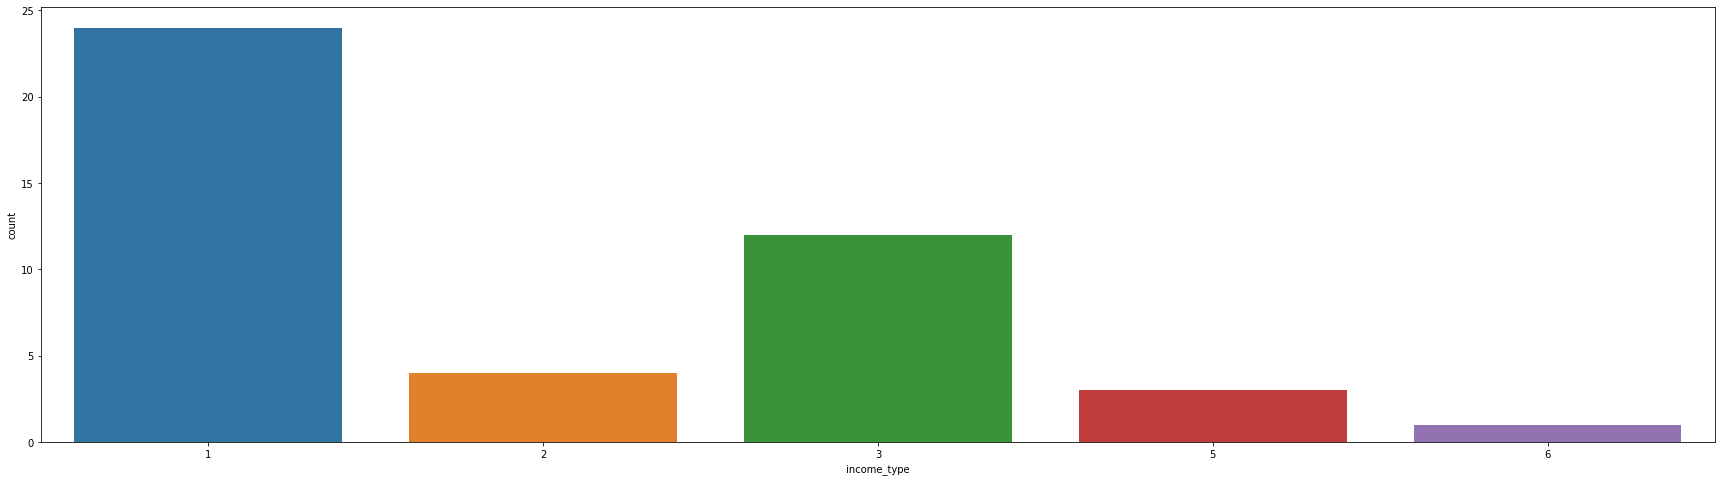

In [204]:
# 회사 입사 연도가 19살보다 적은 값들이 많았지만 대출 가능한 나이가 19살이기 때문에 19살 이상의 값들의 평균으로 채워주는 것이 좋을 것 같다고 생각함.
# 0살 이하에는 1(개인 사업자)가 많다.
# 0살 이하는 44명
respec7 = respec6[respec6['company_enter_age'] < 0]

plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec7)
plt.show()

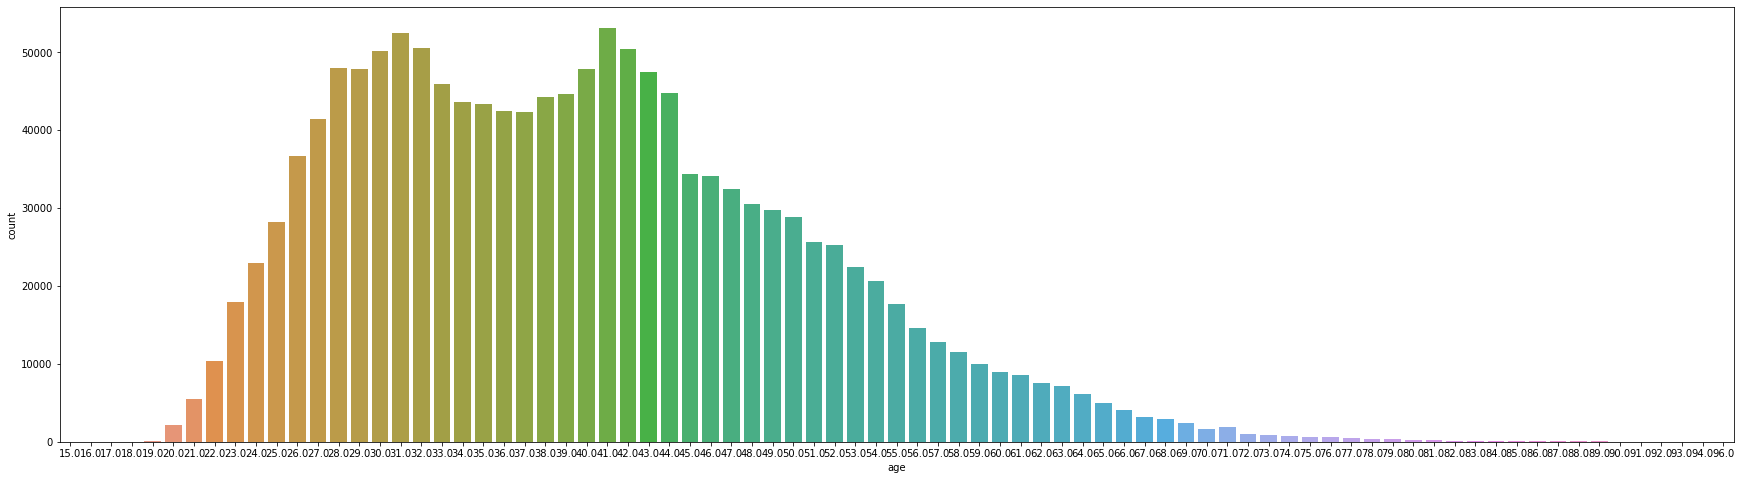

In [207]:
respec7 = respec6['age'] < 0

plt.figure(figsize=(30,8))
sns.countplot(x="age", data=respec)
plt.show()

In [206]:
respec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,age,reage,reage1,repurpose
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,1,20151101.0,기타,...,1000000.0,기타,0.0,NaN,4.0,162000000.0,38.0,30.0,NaN,ETC
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,1,20070201.0,정규직,...,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,55.0,50.0,NaN,SWITCHLOAN
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,2,20210901.0,기타,...,10000000.0,생활비,0.0,NaN,5.0,15000000.0,26.0,20.0,1020.0,LIVING
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,3,20170101.0,정규직,...,2000000.0,생활비,0.0,NaN,7.0,344000000.0,34.0,30.0,NaN,LIVING
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,3,20210901.0,정규직,...,5000000.0,생활비,0.0,0.0,1.0,16000000.0,23.0,20.0,1020.0,LIVING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,2,202106.0,기타,...,5000000.0,사업자금,NaN,NaN,NaN,NaN,23.0,20.0,1020.0,BUSINESS
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,4,NaN,기타,...,50000000.0,생활비,NaN,NaN,1.0,NaN,68.0,60.0,NaN,LIVING
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,3,200908.0,정규직,...,100000000.0,대환대출,NaN,NaN,8.0,200000000.0,40.0,40.0,NaN,SWITCHLOAN
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,3,201705.0,정규직,...,10000000.0,대환대출,NaN,NaN,10.0,117000000.0,48.0,40.0,NaN,SWITCHLOAN


In [49]:
respec7.head(44)

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_age
25852,1430407,281904,1979.0,0.0,2022-05-27 06:36:18,940.0,48000000.0,2,1970.0,기타,자가,100000000.0,사업자금,0.0,NaN,NaN,NaN,-9.0
61276,1840561,319767,2000.0,1.0,2022-03-20 17:32:15,670.0,35000000.0,1,1982.0,계약직,기타가족소유,1000000.0,생활비,NaN,NaN,2.0,5000000.0,-18.0
101639,1135212,652264,1981.0,1.0,2022-04-21 09:54:20,650.0,54000000.0,1,1977.0,정규직,기타가족소유,10000000.0,사업자금,0.0,NaN,5.0,30000000.0,-4.0
104392,149137,652264,1981.0,1.0,2022-05-26 12:09:56,650.0,50000000.0,1,1977.0,정규직,기타가족소유,5000000.0,사업자금,0.0,NaN,5.0,30000000.0,-4.0
159785,1888902,652264,1981.0,1.0,2022-05-16 10:17:52,650.0,54000000.0,1,1977.0,정규직,기타가족소유,10000000.0,사업자금,0.0,NaN,5.0,30000000.0,-4.0
186404,1662716,472622,1973.0,0.0,2022-04-21 20:54:42,960.0,29000000.0,3,1914.0,정규직,전월세,40000000.0,HOUSEDEPOSIT,NaN,NaN,1.0,23000000.0,-59.0
225640,1011251,92946,1969.0,1.0,2022-04-21 19:43:40,680.0,34000000.0,3,1919.0,정규직,전월세,50000000.0,SWITCHLOAN,NaN,NaN,5.0,69000000.0,-50.0
247731,1525724,144890,1959.0,1.0,2022-05-13 18:58:32,NaN,84000000.0,3,1911.0,정규직,자가,300000000.0,INVEST,NaN,NaN,NaN,NaN,-48.0
313392,1186406,212546,1994.0,1.0,2022-05-24 13:46:15,730.0,60000000.0,1,1975.0,계약직,전월세,45000000.0,전월세보증금,0.0,0.0,4.0,181000000.0,-19.0
324389,460996,310113,1976.0,1.0,2022-04-12 14:39:01,610.0,55000000.0,1,1921.0,정규직,전월세,10000000.0,BUSINESS,NaN,NaN,NaN,NaN,-55.0


In [50]:
# 0살 이하 중 loan 데이터 개수는 411개
join1 = pd.merge(respec7, loan_result,left_on = 'application_id', right_on = 'application_id', how = 'left')
join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 410
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       411 non-null    int64  
 1   user_id                              411 non-null    int64  
 2   birth_year                           411 non-null    float64
 3   gender                               411 non-null    float64
 4   insert_time                          411 non-null    object 
 5   credit_score                         283 non-null    float64
 6   yearly_income                        411 non-null    float64
 7   income_type                          411 non-null    int64  
 8   company_enter_month                  411 non-null    float64
 9   employment_type                      411 non-null    object 
 10  houseown_type                        411 non-null    object 
 11  desired_amount                  

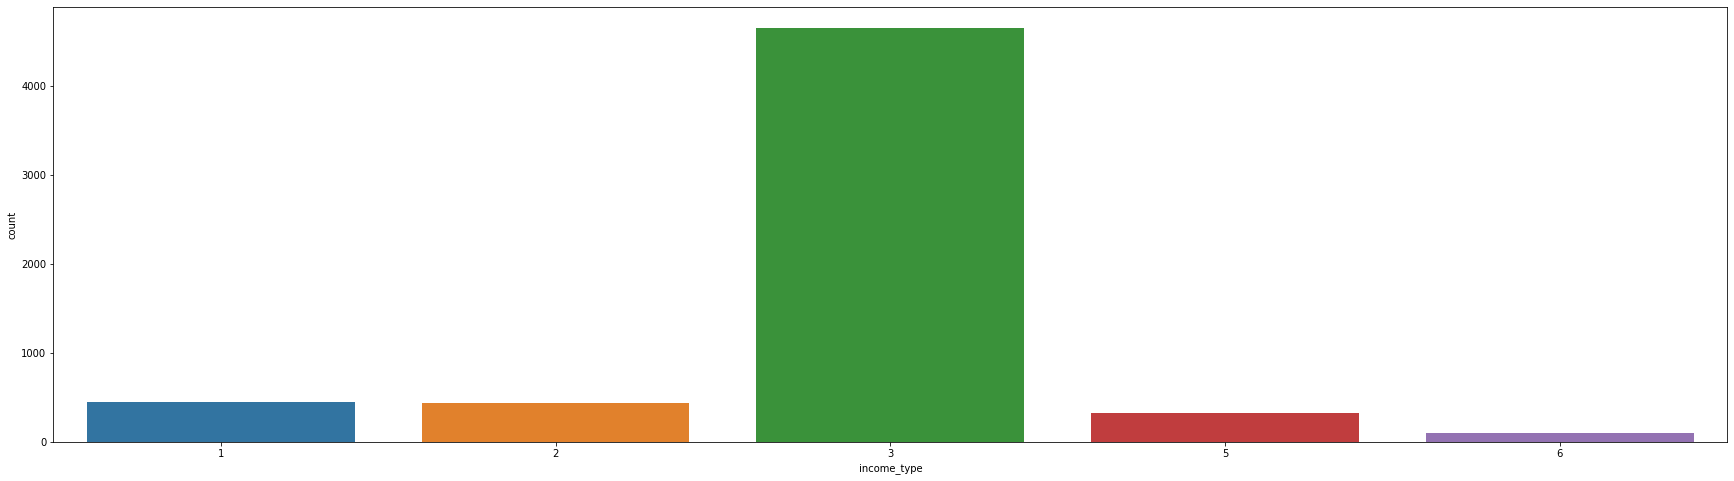

In [51]:
# 19세 이하의 나이에 입사한 사람  -> 사업자가 급격히 증가
respec7 = respec6[respec6['company_enter_age'] < 19]

plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec7)
plt.show()

In [52]:
respec7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 560 to 1222294
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   application_id                       5976 non-null   int64  
 1   user_id                              5976 non-null   int64  
 2   birth_year                           5976 non-null   float64
 3   gender                               5976 non-null   float64
 4   insert_time                          5976 non-null   object 
 5   credit_score                         5434 non-null   float64
 6   yearly_income                        5976 non-null   float64
 7   income_type                          5976 non-null   int64  
 8   company_enter_month                  5976 non-null   float64
 9   employment_type                      5976 non-null   object 
 10  houseown_type                        5976 non-null   object 
 11  desired_amount           

In [53]:
join1 = pd.merge(respec7, loan_result,left_on = 'application_id', right_on = 'application_id', how = 'left')

In [54]:
join1[join1['is_applied'] == 1]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_age,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
13,309076,401051,2003.0,1.0,2022-04-24 12:46:55,840.0,42000000.0,3,2020.0,정규직,...,0.0,1.0,14000000.0,17.0,2022-04-24 12:46:56,52.0,234.0,21000000.0,4.2,1.0
107,411654,871446,1992.0,0.0,2022-03-25 16:26:01,660.0,60000000.0,3,2010.0,정규직,...,NaN,2.0,80000000.0,18.0,2022-03-25 16:26:09,62.0,200.0,20000000.0,7.9,1.0
114,351274,214862,1985.0,0.0,2022-05-25 11:57:07,540.0,6000000.0,3,2003.0,정규직,...,NaN,9.0,94000000.0,18.0,2022-05-25 11:57:07,59.0,251.0,9000000.0,6.7,1.0
115,351274,214862,1985.0,0.0,2022-05-25 11:57:07,540.0,6000000.0,3,2003.0,정규직,...,NaN,9.0,94000000.0,18.0,2022-05-25 11:57:14,19.0,127.0,9000000.0,9.4,1.0
119,351274,214862,1985.0,0.0,2022-05-25 11:57:07,540.0,6000000.0,3,2003.0,정규직,...,NaN,9.0,94000000.0,18.0,2022-05-25 11:57:09,36.0,103.0,9000000.0,6.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42580,148695,774390,2000.0,0.0,2022-04-12 14:00:03,680.0,25000000.0,2,2017.0,기타,...,NaN,2.0,5000000.0,17.0,2022-04-12 14:00:04,6.0,36.0,28000000.0,18.4,1.0
42581,148695,774390,2000.0,0.0,2022-04-12 14:00:03,680.0,25000000.0,2,2017.0,기타,...,NaN,2.0,5000000.0,17.0,2022-04-12 14:00:04,35.0,29.0,3000000.0,15.9,1.0
42586,1772295,858138,1985.0,1.0,2022-03-02 12:33:00,910.0,100000000.0,3,2003.0,정규직,...,NaN,3.0,99000000.0,18.0,2022-03-02 12:33:02,46.0,49.0,35000000.0,15.1,1.0
42622,2135454,738959,1996.0,0.0,2022-05-13 14:15:15,620.0,25000000.0,3,2014.0,정규직,...,0.0,3.0,53000000.0,18.0,2022-05-13 14:15:17,54.0,235.0,42000000.0,15.5,1.0


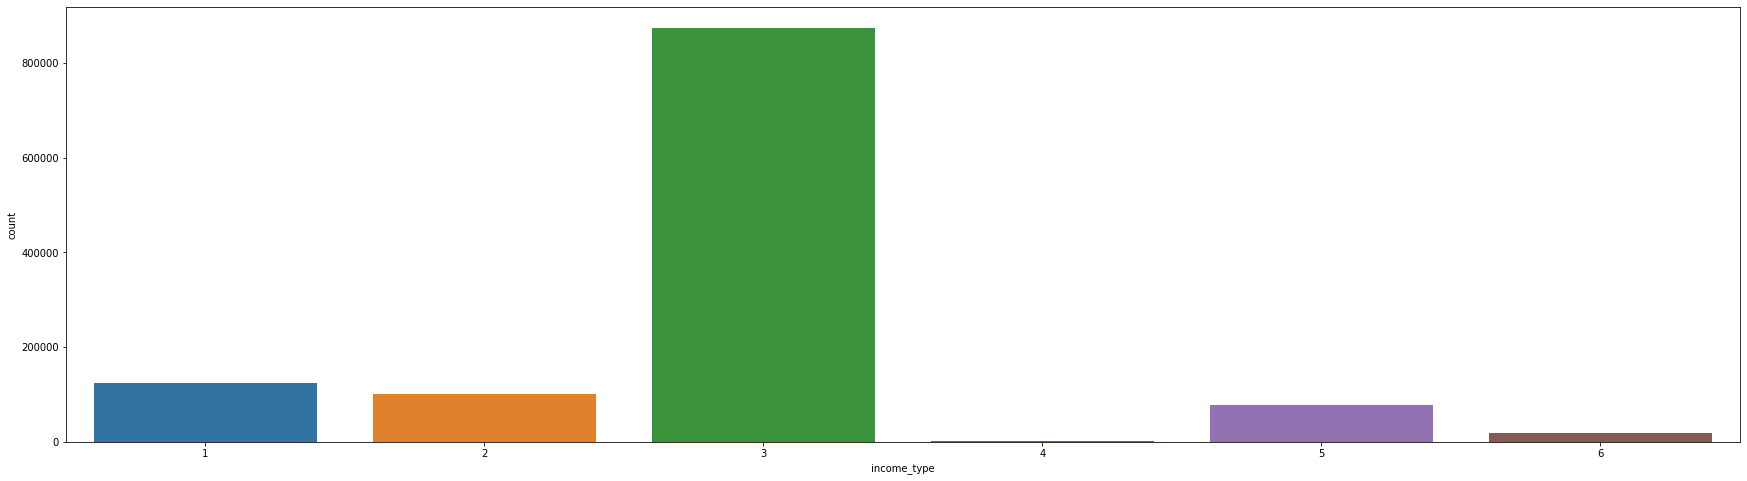

In [379]:
# 미성년자는 4(EARNEDINCOME: 직장가입자(4대보험O))이 없다.
respec7 = respec6[respec6['company_enter_age'] > 19]

plt.figure(figsize=(30,8))
sns.countplot(x="income_type", data=respec7)
plt.show()

#### ver.2



In [380]:
respec7.isnull().sum()

application_id                               0
user_id                                      0
birth_year                                   0
gender                                       0
insert_time                                  0
credit_score                             85058
yearly_income                                0
income_type                                  0
company_enter_month                          0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              508536
personal_rehabilitation_complete_yn    1035624
existing_loan_cnt                       161567
existing_loan_amt                       257256
company_enter_age                            0
dtype: int64

In [381]:
loan_result[loan_result['application_id'] == 1430407]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
5361956,1430407,2022-05-27 06:36:20,15,204,16000000.0,14.3,0.0
5361957,1430407,2022-05-27 06:36:25,19,26,100000000.0,12.4,0.0
5361958,1430407,2022-05-27 06:36:19,13,262,33000000.0,17.5,0.0
5361959,1430407,2022-05-27 06:36:19,55,12,26000000.0,13.9,0.0
5361960,1430407,2022-05-27 06:36:19,42,258,41000000.0,9.1,0.0
5361961,1430407,2022-05-27 06:36:19,1,61,48000000.0,8.9,0.0
5361962,1430407,2022-05-27 06:36:29,23,108,46000000.0,11.0,0.0
5361963,1430407,2022-05-27 06:36:19,29,265,48000000.0,6.9,0.0
5361964,1430407,2022-05-27 06:36:19,3,152,30000000.0,9.9,0.0
5361965,1430407,2022-05-27 06:36:20,21,196,12000000.0,9.0,0.0


In [382]:
respec7 = respec6[(respec6['company_enter_age'] > 13) & (respec6['income_type'] == 1)] 
respec7['company_enter_age'].mean()

38.07014650548395

In [383]:
respec7 = respec6[(respec6['company_enter_age'] > 15) & (respec6['income_type'] == 2)] 
respec7['company_enter_age'].mean()

35.16683526573807

In [384]:
respec7 = respec6[(respec6['company_enter_age'] > 15) & (respec6['income_type'] == 3)] 
respec7['company_enter_age'].mean()

34.36471012094811

In [385]:
respec7 = respec6[(respec6['company_enter_age'] > 15) & (respec6['income_type'] == 5)] 
respec7['company_enter_age'].mean()

34.67634407221459

In [386]:
respec7 = respec6[(respec6['company_enter_age'] > 15) & (respec6['income_type'] == 6)] 
respec7['company_enter_age'].mean()

32.79112781954887

In [387]:
respec6.loc[(respec6['company_enter_age'] < 15) & (respec6['income_type'] == 1), 'company_enter_age'] = 38
respec6.loc[(respec6['company_enter_age'] < 15) & (respec6['income_type'] == 2), 'company_enter_age'] = 35
respec6.loc[(respec6['company_enter_age'] < 15) & (respec6['income_type'] == 3), 'company_enter_age'] = 34
respec6.loc[(respec6['company_enter_age'] < 15) & (respec6['income_type'] == 5), 'company_enter_age'] = 35
respec6.loc[(respec6['company_enter_age'] < 15) & (respec6['income_type'] == 6), 'company_enter_age'] = 33

In [388]:
respec7 = respec6[respec6['income_type'] == 1]
respec7['company_enter_age'].mean()

38.07594046829689

In [389]:
respec7 = respec6[respec6['income_type'] == 3]
respec7['company_enter_age'].mean()

34.364407813166935

In [390]:
respec7 = respec6[respec6['income_type'] == 4]
respec7['company_enter_age'].mean()

40.15614973262032

In [391]:
respec2.loc[(respec2['income_type'] == 1), 'company_enter_age'] = 38
respec2.loc[(respec2['income_type'] == 3), 'company_enter_age'] = 34
respec2.loc[(respec2['income_type'] == 4), 'company_enter_age'] = 40

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [392]:
respec2['company_enter_month'] = 2022 - respec2['company_enter_age']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [393]:
respec2

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_age
6,1614045,860410,1976.0,1.0,2022-06-07 11:29:05,590.0,45000000.0,4,1982.0,기타,자가,15000000.0,대환대출,0.0,NaN,1.0,20000000.0,40.0
26,696416,648540,1965.0,1.0,2022-06-07 11:38:46,750.0,30000000.0,4,1982.0,기타,전월세,20000000.0,생활비,0.0,NaN,1.0,NaN,40.0
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,4,1982.0,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN,40.0
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,4,1982.0,기타,전월세,30000000.0,사업자금,0.0,NaN,1.0,NaN,40.0
45,531087,260981,1976.0,1.0,2022-06-07 11:34:55,680.0,42000000.0,4,1982.0,기타,자가,6000000.0,생활비,0.0,NaN,15.0,42000000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394139,889505,564698,1973.0,1.0,2022-03-22 10:04:18,560.0,35000000.0,4,1982.0,기타,기타가족소유,3000000.0,생활비,NaN,NaN,5.0,13000000.0,40.0
1394174,1108793,374260,1994.0,1.0,2022-03-22 03:59:57,520.0,20000000.0,4,1982.0,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,NaN,NaN,40.0
1394194,834323,145747,1958.0,1.0,2022-03-22 18:10:29,760.0,32000000.0,4,1982.0,기타,자가,100000000.0,대환대출,NaN,NaN,2.0,31000000.0,40.0
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,4,1982.0,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN,40.0


In [394]:
respec7 = pd.merge(respec6, respec2, how='outer')

In [395]:
respec7 = respec7.rename({'company_enter_month':'company_enter_year'},
                         axis = 1)

In [396]:
respec7[respec7['application_id'] == 1851645]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_year,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,company_enter_age
940262,1851645,62189,1963.0,1.0,2022-06-28 12:20:40,580.0,100000000.0,2,1900.0,기타,자가,50000000.0,생활비,0.0,NaN,1.0,NaN,35.0


In [397]:
respec7 = respec7[['application_id', 'company_enter_year']]

In [398]:
respec = pd.merge(respec7, respec,left_on = 'application_id', right_on = 'application_id', how = 'right')

In [399]:
respec.drop(['company_enter_month'], axis = 1, inplace = True)

In [400]:
respec.isnull().sum()

application_id                               0
company_enter_year                           0
user_id                                      0
birth_year                               12959
gender                                       0
insert_time                                  0
credit_score                            105112
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198540
existing_loan_amt                       313752
dtype: int64

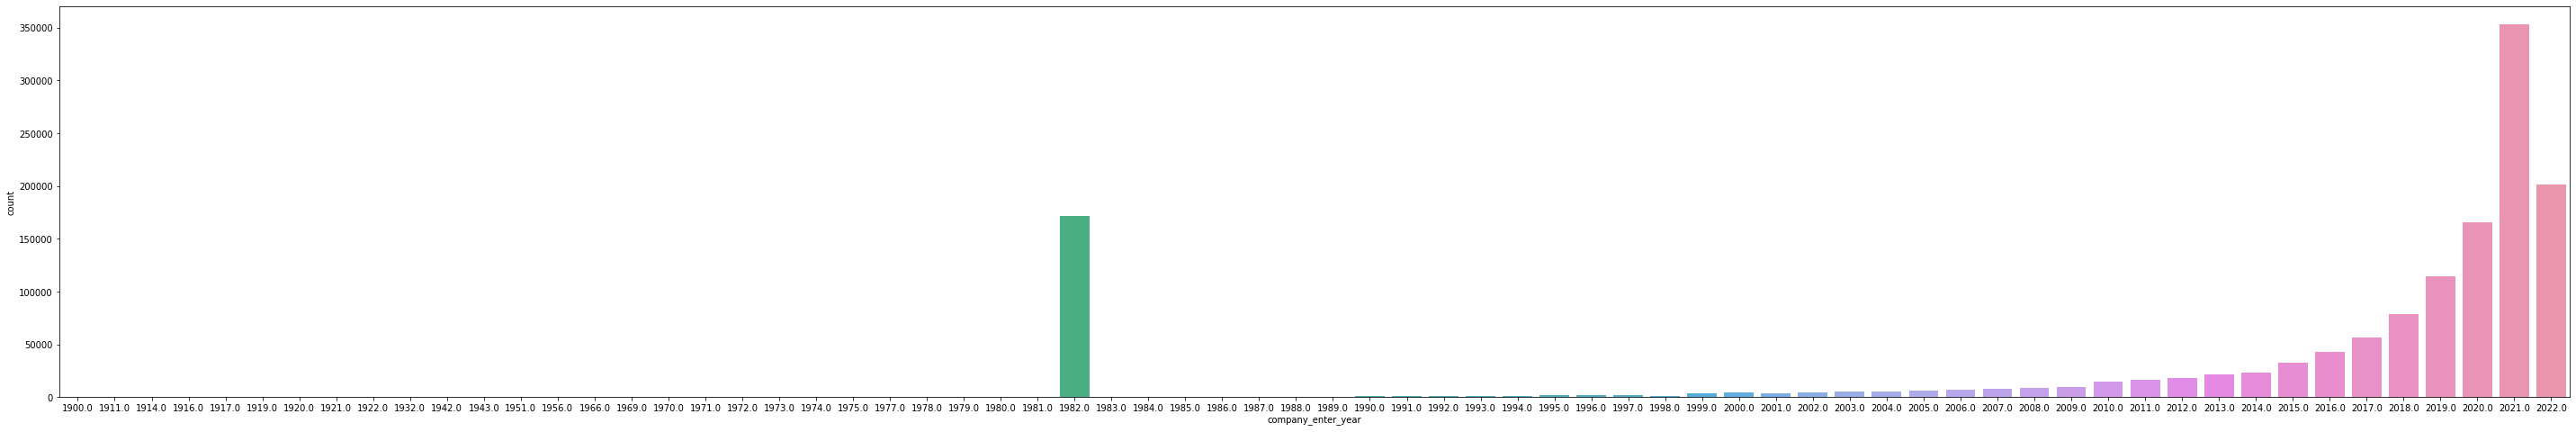

In [401]:
plt.figure(figsize=(50,8))
sns.countplot(x="company_enter_year", data=respec)
plt.show()

In [402]:
respec['company_enter_year'].min()

1900.0

In [403]:
respec[respec['company_enter_year'] == 1900]

,application_id,company_enter_year,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
72199,1851645,1900.0,62189,1963.0,1.0,2022-06-28 12:20:40,580.0,100000000.0,2,기타,자가,50000000.0,생활비,0.0,NaN,1.0,NaN
1035824,809206,1900.0,214941,1972.0,1.0,2022-06-25 12:04:46,860.0,60000000.0,3,정규직,자가,50000000.0,대환대출,0.0,NaN,2.0,53000000.0


In [404]:
respec7[respec7['application_id'] == 1851645]

,application_id,company_enter_year
940262,1851645,1900.0


# 데이터 합치기

In [ ]:
#join1 = pd.merge(user_spec, loan_result,left_on = 'application_id', right_on = 'application_id', how = 'right')

In [ ]:
#join2 = pd.merge(join1, relog,left_on = 'user_id', right_on = 'user_id', how = 'left')